In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [45]:
df = pd.read_csv('C://Users//USER//Documents//cardio...csv')

In [46]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,newage
0,0,18393,2,168,62.0,110,80,1,1,0,0.0,1,0,73
1,1,20228,1,156,85.0,140,90,3,1,0,0.0,1,1,68
2,2,18857,1,165,64.0,130,70,3,1,0,0.0,0,1,72
3,3,17623,2,169,82.0,150,100,1,1,0,0.0,1,1,75
4,4,17474,1,156,56.0,100,60,1,1,0,0.0,0,0,76


In [47]:
df.shape

(70000, 14)

In [48]:
df.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           1
active         0
cardio         0
newage         0
dtype: int64

In [49]:
df.dropna(inplace=True)

In [50]:
df.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
newage         0
dtype: int64

In [51]:
df.drop(['age','id'],axis=1,inplace=True)

In [52]:
df.columns

Index(['gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc',
       'smoke', 'alco', 'active', 'cardio', 'newage'],
      dtype='object')

In [53]:
def derive_diabetic(row):
    if row['cholesterol'] == 3 or row['gluc'] == 3:
        return 3  # Diabetic
    elif row['gluc'] == 2:
        return 2  # Prediabetic
    else:
        return 1  # Non-diabetic

# Apply the function to derive diabetic status
df['diabetic'] = df.apply(derive_diabetic, axis=1)

In [54]:
df.head()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,newage,diabetic
0,2,168,62.0,110,80,1,1,0,0.0,1,0,73,1
1,1,156,85.0,140,90,3,1,0,0.0,1,1,68,3
2,1,165,64.0,130,70,3,1,0,0.0,0,1,72,3
3,2,169,82.0,150,100,1,1,0,0.0,1,1,75,1
4,1,156,56.0,100,60,1,1,0,0.0,0,0,76,1


In [55]:
df.columns

Index(['gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc',
       'smoke', 'alco', 'active', 'cardio', 'newage', 'diabetic'],
      dtype='object')

In [61]:
newdata =df[['cholesterol','gluc', 'diabetic']]

In [62]:
newdata.corr()

,cholesterol,gluc,diabetic
cholesterol,1.000000,0.451521,0.777429
gluc,0.451521,1.000000,0.749838
diabetic,0.777429,0.749838,1.000000


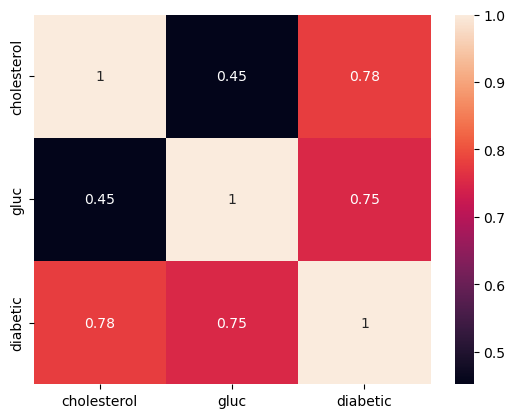

In [66]:
sns.heatmap(newdata.corr(),annot=True)
plt.show()

In [67]:
df.to_csv('newcardiodata.csv', index= False)